# Formation Pratique 4 : Analyse et traitement d'un jeu de données

Le but de cette formation pratique est d'analyser un jeu de données sous les différents angles et de proposer diverses approches pour traiter les données manquantes.

#### **Table des matières**  
[1. Introduction](#intro)
<br>[2. Lecture des données](#lecture)
<br>[3. Analyse statistique](#stats)
<br>[4. Visualisation des données](#courbes)
<br>[5. Traitement des données manquantes](#manquantes)
<br>[6. Mise à l'échelle des données](#echelle)
<br>&emsp;[6.1. Transformation Min/Max](#minmax)
<br>&emsp;[6.2. Standardiser les données](#standardiser)
<br>&emsp;[6.3. Normaliser les données](#normaliser)
<br>&emsp;[6.4. Binariser les données](#binariser)
<br>[7. Sélection des caractéristiques](#selection)
<br>&emsp;[Sélection univariée](#univariee)
<hr>

<a name="intro">

# 1. Introduction

Le diabète a un impact sur la santé. Il se manifeste par des lésions d'organes tels la rétine, les reins, etc. Les premières nations de l'Arizona ([PIMA](https://en.wikipedia.org/wiki/Pima)) sont connues pour avoir une prévalence du diabète extrêmement élevée dans la population. Plusieurs études épidémiologiques ont été réalisées à ce sujet:


[En Arizona, les Indiens Pimas recordmen du diabète](https://www.liberation.fr/sciences/2000/05/16/en-arizona-les-indiens-pimas-recordmen-du-diabete_326521)

[Diabète et obésité : qu’avons-nous appris de l’étude des Indiens Pimas ?](http://www.ipubli.inserm.fr/bitstream/handle/10608/1525/2000_10_1057.pdf?sequence=1)

L'étude contient 768 enregistrements pour 8 caractéristiques. Uniquement les femmes âgées de 21 ans et plus ont participées à cette étude. Par ailleurs, les auteurs ont mentionné que plusieurs données sont manquantes.

Les 8 caractéristiques sont:

    1. Nombre de fois enceinte ("NumTimesPrg")
    2. Concentration de glucose plasmatique à 2 heures dans un test oral de tolérance au glucose ("PlasmaGlcConc")
    3. Tension artérielle diastolique (mm Hg) ("BloodP")
    4. Épaisseur du pli cutané du triceps (mm) ("SkinThick")
    5. Insuline sérique à 2 heures (mu U / ml) ("TwoHourSerIns")
    6. Indice de masse corporelle (poids en kg / (taille en m) ^ 2) ("BMI")
    7. Fonction généalogique du diabète ("DiPedFunc")
    8. Âge (années) ("Age")
    
    
    
    Numéro de l'attribut  Moyenne   Écart-Type
    1.                     3.8        3.4
    2.                   120.9       32.0
    3.                    69.1       19.4
    4.                    20.5       16.0
    5.                    79.8      115.2
    6.                    32.0        7.9
    7.                     0.5        0.3
    8.                    33.2       11.8


En plus de cela, il y a une variable de classe:

    9. Variable de classe (0 ou 1) ("HasDiabetes")

La valeur ``1`` correspond a un test positif au diabète.

In [1]:
%%html
<style>
table {float:left}
</style>

||valeur de classe|nombre de cas|
|-|:---------------:|:-------------:|
non diabétique|0|500|
diabétique|1|268|

---

<a name="lecture">

# 2. Lecure des données

Les données sont importées dans un ``DataFrame`` pandas. Les données sont séparées par une virgule, le séparateur par défaut pour la lecture des données à partir d'un ``csv`` dans ``Pandas``.

Comme l'entête est manquante dans le fichier csv, nous allons l'intégrer dans le DataFrame au moment de la lecture.

In [2]:
import pandas as pd

entete = ["NumTimesPrg", "PlasmaGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv("pima-indians-diabetes.data.csv",names=entete)

In [3]:
# On affiche les premiers éléments pour avoir une idée.

df.head(5)

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# On affiche la taille du DataFrame

df.shape

(768, 9)

In [5]:
# On affiche le type des éléments dans chaque colonne

df.dtypes

NumTimesPrg        int64
PlasmaGlcConc      int64
BloodP             int64
SkinThick          int64
TwoHourSerIns      int64
BMI              float64
DiPedFunc        float64
Age                int64
HasDiabetes        int64
dtype: object

---

<a name="stats">

# 3. Analyse statistique

In [6]:
# On affiche des statistiques "rapides" pour les différentes colonnes avec un arrondi de 3.

round(df.describe(),3)

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [7]:
# On groupe les éléments par la catégorie "HasDiabetes".
# On valide ainsi combien de femmes ont ou n'ont pas le diabète.

# Pour rappel, la valeur 1 correspond a un test positif au diabète.

df.groupby('HasDiabetes').size()

HasDiabetes
0    500
1    268
dtype: int64

In [8]:
# On affiche le taux de corrélation entre tous les éléments du DataFrame.

round(df.corr(),3)

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
PlasmaGlcConc,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodP,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThick,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
TwoHourSerIns,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiPedFunc,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
HasDiabetes,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


On constate une faible corrélation de ``HasDiabetes`` avec ``l'âge``, ``la masse corporelle``, ``le nombre de fois enceinte`` et ``la concentration de glucose plasmatique à 2 heures``.

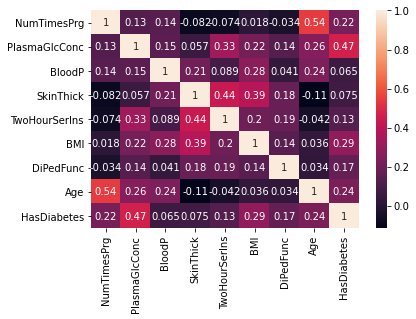

In [9]:
# On trace le même tableau mais sous la forme d'un "heatmap".

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot = True)
plt.show()

In [10]:
# Le "skew" va nous donner une idée de la nature des courbes de densité.
# Pour rappel, un skew de 0, les données sont centrées, phénomène rare.
# skew < 0, la courbe penche vers la droite.
# skew > 0, la courbe penche vers la gauche.

df.skew()

NumTimesPrg      0.901674
PlasmaGlcConc    0.173754
BloodP          -1.843608
SkinThick        0.109372
TwoHourSerIns    2.272251
BMI             -0.428982
DiPedFunc        1.919911
Age              1.129597
HasDiabetes      0.635017
dtype: float64

---

<a name="courbes">

# 4. Visualisation des données

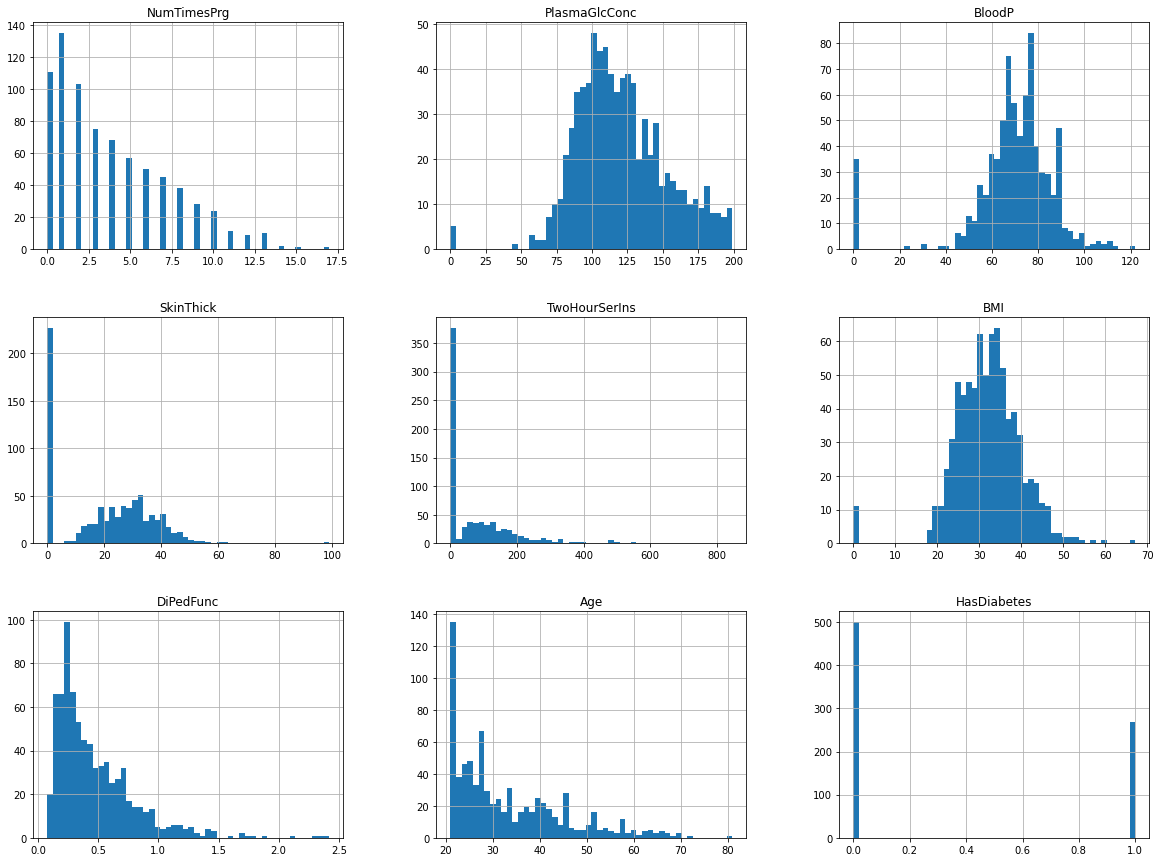

In [11]:
# Nous allons tracer les histogrammes pour avoir la nature des courbes.
# Nous avons pris un bins de 50.

df.hist(bins=50,figsize=(20,15))
plt.show()

On sait déjà qu'il y a des <b>zéros étranges</b>. Par exemple, une masse corporelle nulle n'a pas de sens. En introduction, nous avons mentionné des données manquantes, les histogrammes les mettent en évidence.

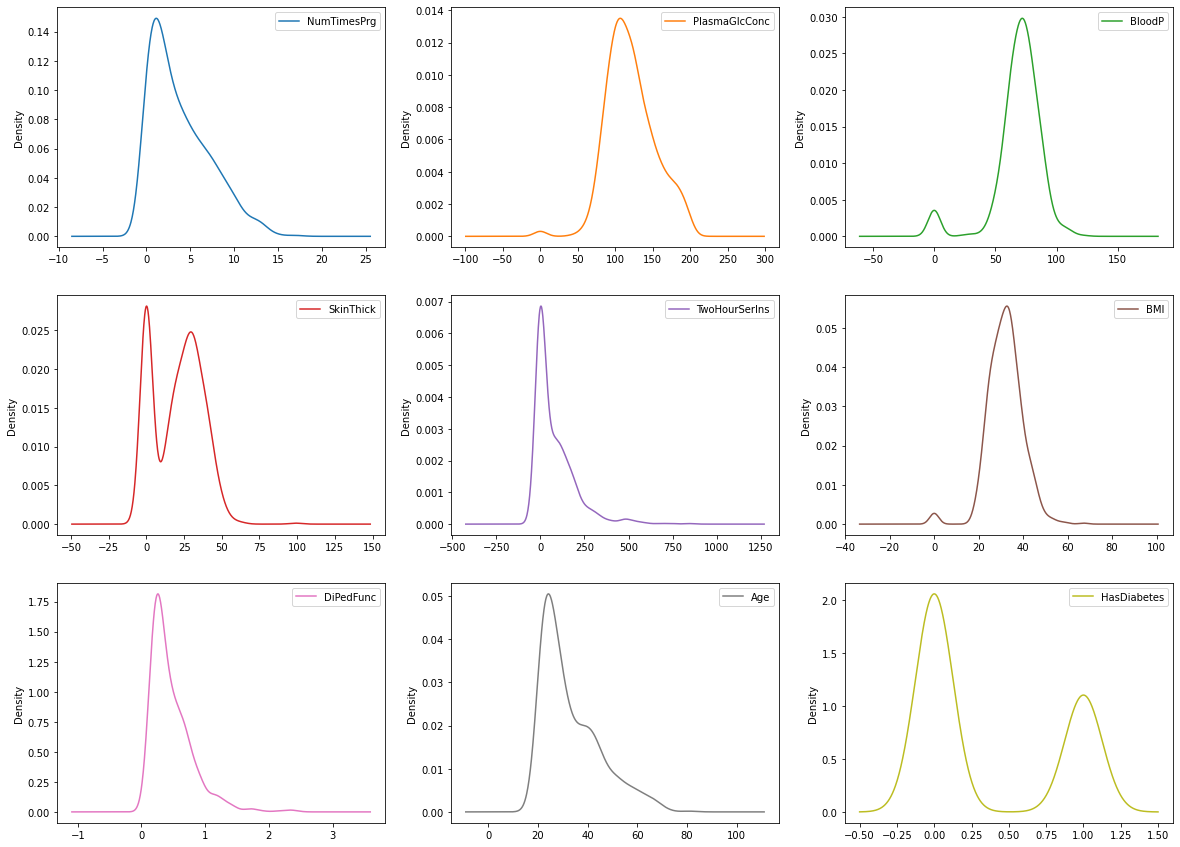

In [12]:
# On trace maintenant les courbes de densité.

df.plot(kind='density',subplots=True, layout=(3,3), sharex=False,figsize=(20,15))
plt.show()

Les <b>zéros étranges</b> sont visibles la aussi avec l'apprition d'une 2e "bosse". La seule qui a sa place est en rapport avec le 9e paramètre, la variable de classe (a ou n'a pas le diabète). On voit que la plupart des densités ont la forme d'une gaussienne.

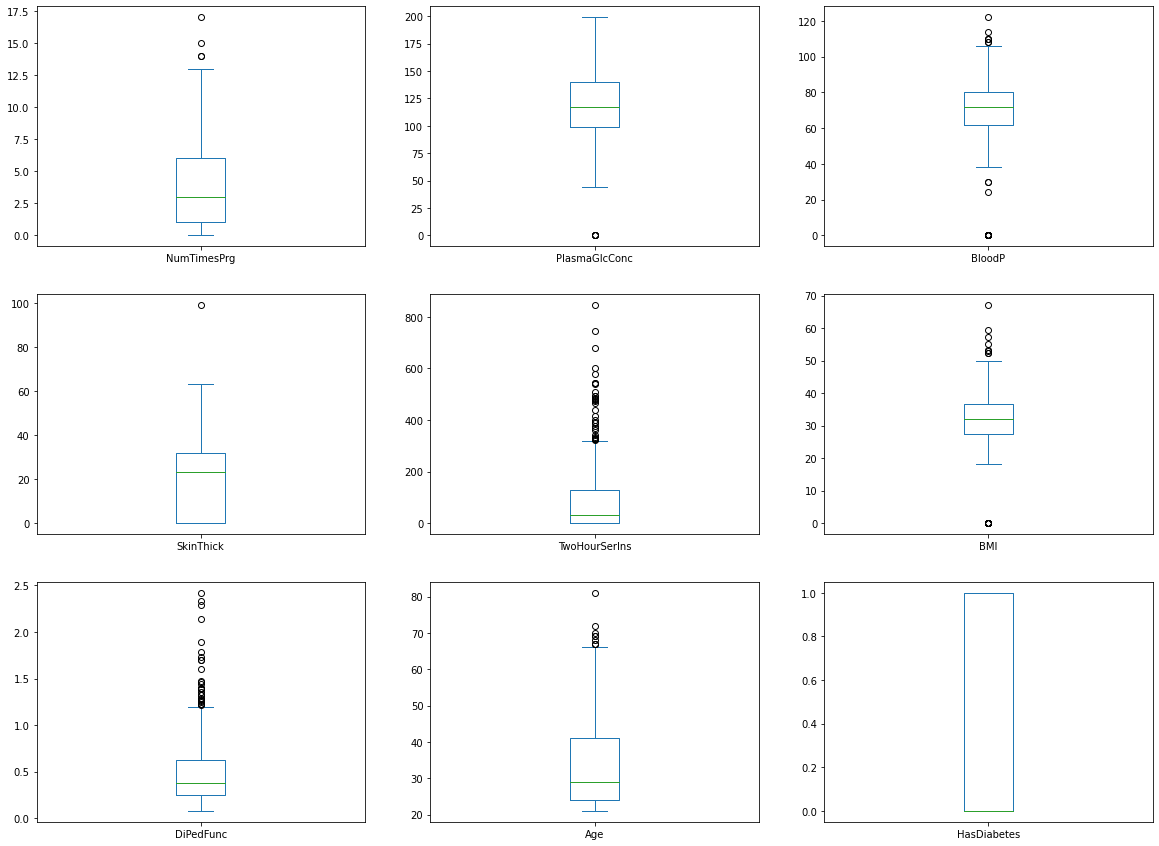

In [13]:
# Les boîtes à moustache

df.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

On remarque la présence de plusieurs valeurs extrêmes dont beaucoup sont causées par les zéros étranges. Ces valeurs sont-elles significatives au point de les garder? Ou bien, faudrait-il les retirer?

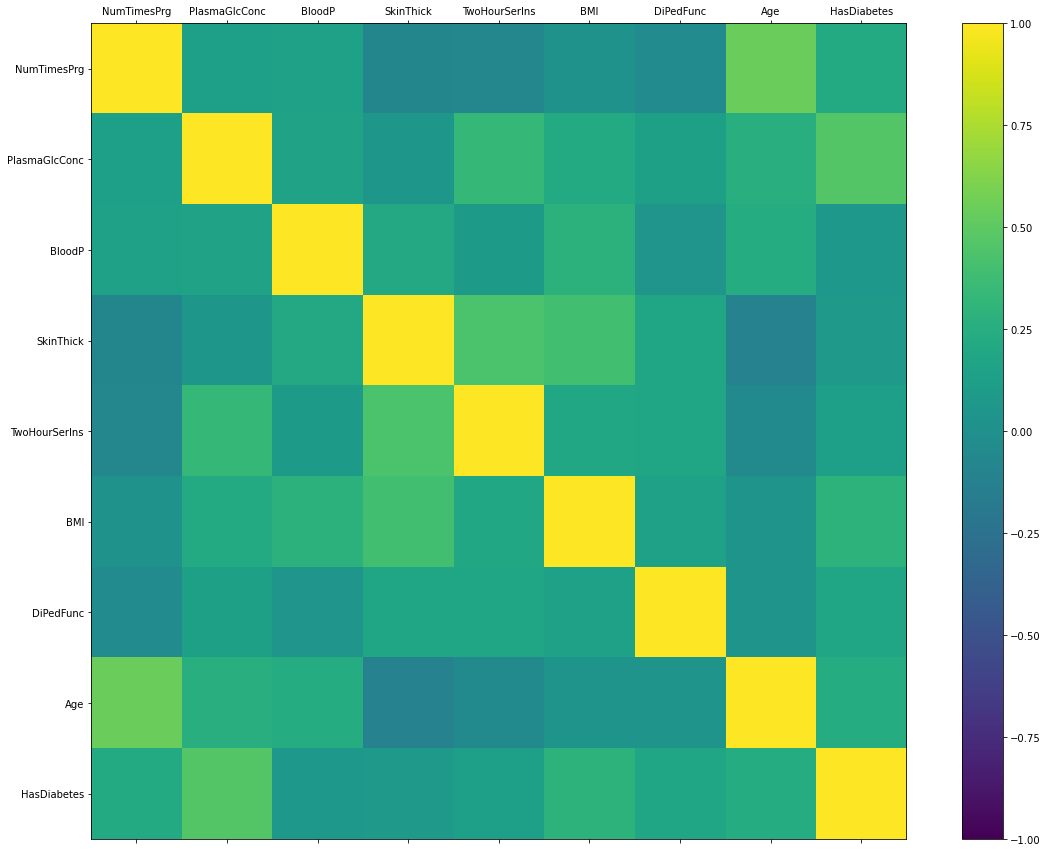

In [14]:
# Le coéfficient de corrélation tracé autrement

import numpy as np

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(entete)
ax.set_yticklabels(entete)
plt.show()

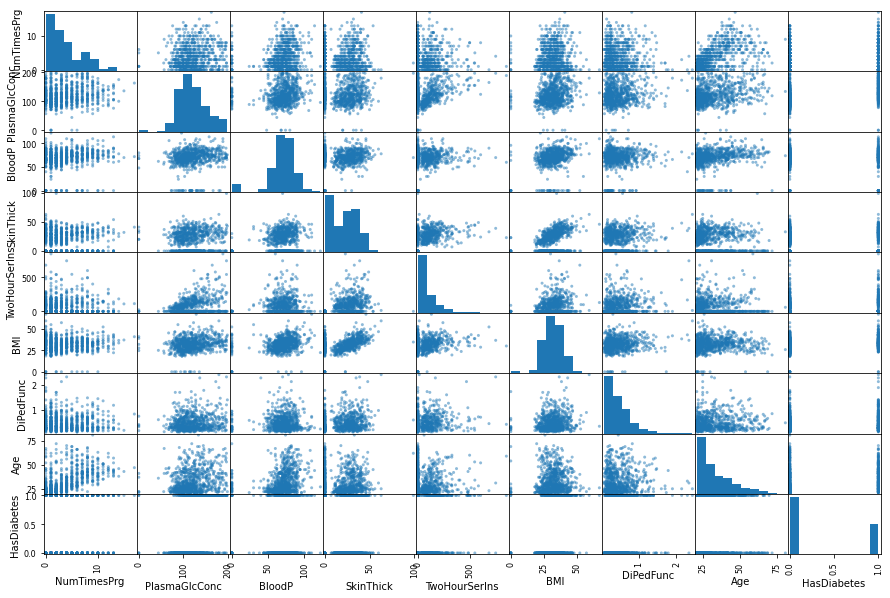

In [15]:
# On trace les histogrammes croisés de tout le monde.
# Sur la diagonale, les histrogrammes déjà tracés au début de cette section.

from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,10))
plt.show()

---

<a name="manquantes">

# 5. Traitement des données manquantes

On parle de zéros étranges depuis le début, mais en fin de compte on en a combien au juste?

In [16]:
df.isnull().sum()

NumTimesPrg      0
PlasmaGlcConc    0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

<b>ZÉRO!</b> Ah bon et pourtant? La fonction ```isnull``` cherche uniquement après les valeurs non définies (```NaN```). Le nom de la fonction n'a rien à voir avec sa fonction réelle! Pour trouver les zéros, il faut procéder autrement:

In [17]:
(df==0).sum(axis=0)

NumTimesPrg      111
PlasmaGlcConc      5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes      500
dtype: int64

On ne touche pas à ```HasDiabetes```, le 0 correspond en effet à une personne qui n'a pas de diabète. On ne touche pas non plus au 0 de ```NumTimesPrg```, même si le nombre semble élevé. C'est possible qu'un certain nombre de femmes ne sont pas tombées enceinte. Par ailleurs, on supprime de la liste ```DiPedFunc``` et ```Age```, ils n'ont pas de valeurs nulles.

On se concentre donc que sur: ```PlasmaGlcConc``` ```BloodP``` ```SkinThick``` ```TwoHourSerIns``` ```BMI```

In [18]:
(df[["PlasmaGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI"]] == 0).sum()

PlasmaGlcConc      5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
dtype: int64

<br><b>Quoi faire avec ces zéros?</b>

Nous avons mentionné que le jeu de données contenait 768 valeurs. Si on supprime les 374 zéros de la caractéristique ```TwoHourSerIns``` par ricochet les lignes associées (des autres caractéristiques) ...

Le résultat des opérations sera sauvegardé dans le nouveau dataframe df_test pour préserver les données d'origine du dataframe df.

In [19]:
df_test = df.loc[(df[['TwoHourSerIns']] != 0).all(axis=1)]

In [20]:
df_test.shape

(394, 9)

On tombe à 394. On vient d'enlever la moitié du jeu de données! Waoua. Ce n'est pas une bonne affaire!

Une autre approche est de supprimer la caractéristique ```TwoHourSerIns```. On montre comment le faire et on verra plus tard si c'était une bonne idée de le faire.

In [21]:
df_test = df.drop(columns=['TwoHourSerIns'])

In [22]:
df.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df_test.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


On voit que la colomne ```TwoHourSerIns``` a été effacée.

<br><b>Remplacer par la moyenne</b>

On calcule la moyenne de tout le monde

Vous avez deux options:

1. Tenir compte du nombre de zéros dans le calcul de la moyenne.
2. Supprimer le nombre de zéros lors du calcul de la moyenne. Le but est de remplacer les zéros, et non pas de les prendre en considération.

In [24]:
# 1. On tient compte des zéros
df.mean()

NumTimesPrg        3.845052
PlasmaGlcConc    120.894531
BloodP            69.105469
SkinThick         20.536458
TwoHourSerIns     79.799479
BMI               31.992578
DiPedFunc          0.471876
Age               33.240885
HasDiabetes        0.348958
dtype: float64

On voit que lors du calcul de la moyenne de la variable de classe ```HasDiabetes```, la fonction a pris en compte aussi les zéros. En effet, le nombre de 1 est de 268. La moyenne est donc de 268/768=0.3489

In [25]:
# 2. On ne tient pas compte des zéros
df.replace(0, np.NaN).mean()

NumTimesPrg        4.494673
PlasmaGlcConc    121.686763
BloodP            72.405184
SkinThick         29.153420
TwoHourSerIns    155.548223
BMI               32.457464
DiPedFunc          0.471876
Age               33.240885
HasDiabetes        1.000000
dtype: float64

On voit que lors du calcul de la moyenne de la variable de classe ```HasDiabetes```, la fonction n'a pas pris en compte les zéros. En effet, le nombre de 1 est de 268. La moyenne est donc de 268/268=1.0.

Ce qu'on a fait en réalité, nous avons remplacé les zéros par NaN. La fonction mean ne prend pas en considération NaN. Ainsi nous avons évité que les zéros soient pris en considération lors du calcul de la moyenne.

<br>On repart à zéro ...

In [26]:
df_test = df

In [27]:
df_test.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
cols = ['PlasmaGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']
df_test[cols] = df_test[cols].replace(0, np.NaN)

In [29]:
df_test.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Constater la présence des NaN à la place des 0.

Maintenant, nous allons remplacer ces NaN par la moyenne calculée sans tenir compte des zéros.

Le paramètre ```inplace=True``` va forcer le changement dans le dataframe (par défaut, il fait juste semblant de le faire mais le changement n'est pas permanent).

In [30]:
df_test.fillna(df_test.mean(), inplace=True)

In [31]:
df_test.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


On voit bien que dans les premières lignes de ```TwoHourSerIns``` le changement a bien eu lieu.

<br><b>Remplacer par la médiane</b>

Refaire le même exercice mais avec la médiane ou le mode.

<hr>

<a name="echelle">

# 6. Mise à l'échelle des données

<a name="minmax">

## 6.1. Transformation Min/Max

Le but est de normaliser les données entre les valeurs ``0`` et ``1``.
Utile pour:
- l'optimisation, comme l'utilisation de la descente du gradient.
- regression (poids)
- les réseaux de neurones (poids)
- Les k plus proches voisins (distance)

In [56]:
# On prend une copie de df.
df2 = df

In [57]:
# On laisse tomber les étiquettes, on prend que les valeurs et on en profite pour mettre le tout dans un format numpy
donnees = df2.to_numpy()

In [60]:
# X récupère les 8 caractéristiques.
# y récupère la variable de classe.
X = donnees[:,0:8]
y = donnees[:,8]

In [61]:
# On importe les différentes librairies si ce n'est pas déjà fait.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [62]:
# On définit les paramètres de la fonction MinMaxScaler. On veut que la normalisation soit entre 0 et 1.
scaler = MinMaxScaler(feature_range=(0,1))

# On effectue la transformation uniquement sur les caractéristiques. On ne touche pas à la variable de classe (y).
Xredim = scaler.fit_transform(X)

In [63]:
# On affiche les 5 premières valeurs avec un arrondi de 3.
print(np.round(Xredim[0:5,:],3))

[[0.353 0.671 0.49  0.304 0.17  0.315 0.234 0.483]
 [0.059 0.265 0.429 0.239 0.17  0.172 0.117 0.167]
 [0.471 0.897 0.408 0.241 0.17  0.104 0.254 0.183]
 [0.059 0.29  0.429 0.174 0.096 0.202 0.038 0.   ]
 [0.    0.6   0.163 0.304 0.185 0.509 0.944 0.2  ]]


<br>Nous allons voir comment le calcul a été effectué.

In [67]:
# On affiche de nouveau l'entête de df2
df2.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [65]:
# Des stats du dataframe df2
df2.describe()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


On cherche à calculer cette formule:

$ \Large \frac{x_i–min(x)}{max(x)–min(x)} $

Le calcul à la main pour la première valeur: = (6 - 0)/(17-0) = 6/17 = 0.353

In [68]:
# Le même calcul mais autrement:
round((df2['NumTimesPrg'][0] - df2['NumTimesPrg'].min()) / (df2['NumTimesPrg'].max() - df2['NumTimesPrg'].min()),3)

0.353

Il s'agit bien de la première valeur de Xredim.

<a name="standardiser">

## 6.2. Standardiser les données

Certaines caractéristiques ont la forme d'une distribution gaussienne. Les standardiser consiste à les rendre sous la forme d'une loi normale centrée réduite ($\mu$=0 et $\sigma$=1).

In [56]:
# On prend une copie de df.
df2 = df

In [57]:
# On laisse tomber les étiquettes, on prend que les valeurs et on en profite pour mettre le tout dans un format numpy
donnees = df2.to_numpy()

In [60]:
# X récupère les 8 caractéristiques.
# y récupère la variable de classe.
X = donnees[:,0:8]
y = donnees[:,8]

In [71]:
# On importe les différentes librairies si ce n'est pas déjà fait.
from sklearn.preprocessing import StandardScaler

In [72]:
# On définit les paramètres de la fonction StandardScaler.
scaler = StandardScaler().fit(X)
# On effectue la transformation uniquement sur les caractéristiques. On ne touche pas à la variable de classe (y).
XStandard = scaler.transform(X)
# On affiche les 5 premières valeurs avec un arrondi de 3.
print(np.round(XStandard[0:5,:],3))

[[ 0.64   0.865 -0.034  0.666 -0.     0.166  0.468  1.426]
 [-0.845 -1.206 -0.53  -0.017 -0.    -0.853 -0.365 -0.191]
 [ 1.234  2.016 -0.695  0.    -0.    -1.333  0.604 -0.106]
 [-0.845 -1.075 -0.53  -0.7   -0.724 -0.634 -0.921 -1.042]
 [-1.142  0.503 -2.681  0.666  0.147  1.549  5.485 -0.02 ]]


On cherche à calculer cette formule:

$ \Large \frac{x_i–mean(x)}{stdev(x)} $

In [73]:
# Des stats du dataframe df2
df2.describe()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Le calcul à la main pour la première valeur: = (6 - 3.845052)/3.369578 	 = 0.64

In [74]:
# Le même calcul mais autrement:
round((df2['NumTimesPrg'][0] - df2['NumTimesPrg'].mean()) / df2['NumTimesPrg'].std(),3)

0.64

Il s'agit bien de la première valeur de XStandard.

<a name="normaliser">

## 6.3 Normaliser les données

La normalisation consiste à faire en sorte que la somme euclidienne de toutes les caractéristiques sur une ligne soit égale à 1. Cette approche est intéressante quand on a trop de zéros.

- https://mathworld.wolfram.com/L2-Norm.html
- https://fr.wikipedia.org/wiki/Norme_(math%C3%A9matiques)

In [75]:
# On prend une copie de df.
df2 = df

In [76]:
# On laisse tomber les étiquettes, on prend que les valeurs et on en profite pour mettre le tout dans un format numpy
donnees = df2.to_numpy()

In [77]:
# X récuppère les 8 caractéristiques.
# y récuppère la variable de classe.
X = donnees[:,0:8]
y = donnees[:,8]

In [78]:
# On importe les différentes librairies si ce n'est pas déjà fait.
from sklearn.preprocessing import Normalizer

In [79]:
# On définit les paramètres de la fonction Normalizer.
scaler = Normalizer().fit(X)
# On effectue la transformation uniquement sur les caractéristiques. On ne touche pas à la variable de classe (y).
XNormalise = scaler.transform(X)
# On affiche les 5 premières valeurs avec un arrondi de 3.
print(np.round(XNormalise[0:5,:],3))

[[0.025 0.624 0.304 0.148 0.656 0.142 0.003 0.211]
 [0.005 0.434 0.337 0.148 0.795 0.136 0.002 0.158]
 [0.032 0.722 0.252 0.115 0.614 0.092 0.003 0.126]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


Si vous faites la somme de la première ligne ...

In [80]:
round(np.sum(XNormalise**2, axis=1)[0])

1

Le calcul en lui-même:

In [81]:
df2.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [82]:
round(df2['NumTimesPrg'].loc[0]/np.sqrt((df2.iloc[:,0:8]**2).sum(axis=1)[0]),3)

0.025

Il s'agit bien de la première valeur de XNormalise.

<a name="binariser">

## 6.4. Binariser les données

Elle consiste à remplacer toute valeur supérieure à un seuil par 1, dans le cas contraire on met la valeur 0. Elle est utile quand on veut créer de nouvelles caractéristiques.

In [83]:
# On prend une copie de df.
df2 = df

In [84]:
# On laisse tomber les étiquettes, on prend que les valeurs et on en profite pour mettre le tout dans un format numpy
donnees = df2.to_numpy()

In [85]:
# X récuppère les 8 caractéristiques.
# y récuppère la variable de classe.
X = donnees[:,0:8]
y = donnees[:,8]

In [86]:
# On importe les différentes librairies si ce n'est pas déjà fait.
from sklearn.preprocessing import Binarizer

In [87]:
# On définit les paramètres de la fonction Binarizer. Le seuil est fixé à 0.0
binariser = Binarizer(threshold=0.0).fit(X)
# On effectue la transformation uniquement sur les caractéristiques. On ne touche pas à la variable de classe (y).
XBinaire = binariser.transform(X)
# On affiche les 5 premières valeurs avec un arrondi de 3.
print(np.round(XBinaire[0:5,:],3))

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


On constate que toutes les valeurs ont été mises à 1, sauf une. La 5e valeur de la première colonne. On vérifie les raisons.

In [89]:
df2.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Effectivement, si on fait abstraction de la varaible de classe (9e colonne), il y a un seul 0. C'est la seule valeur qui n'a pas dépassé le seuil fixé.

<hr>

<a name="selection">

# 7. Sélection des caractéristiques

L'objectif est de réduire le surapprentissage, améliorer les performances et réduire le temps d'apprentissage. On cherche donc quels sont les paramètres qui ont une relation statistique forte avec la cible. Il y a plusieurs approches. On peut citer: sélection récursive, analyse en composantes principales, la forêt aléatoire, les arbres extrêmement randomisés et la sélection univariée. Nous allons expliquer comment faire la dernière technique vu que les algorithmes utilisés dans les autres techniques ne seront étudiés que plus tard dans le cours. 

<a name="univariee">

## Sélection univariée

La librairie ``SelectBest`` offre la possibilité de choisir les caractéristiques à l’aide d’un test statistique.

Nous allons utiliser le test du $\chi^2$ pour sélectionner les 4 meilleures caractéristiques ayant une influence significative sur la cible.

In [96]:
# On prend une copie de df.
df2 = df

In [97]:
# On laisse tomber les étiquettes, on prend que les valeurs et on en profite pour mettre le tout dans un format numpy
donnees = df2.to_numpy()

In [98]:
# X récuppère les 8 caractéristiques.
# y récuppère la variable de classe.
X = donnees[:,0:8]
y = donnees[:,8]

In [99]:
# On importe les différentes librairies si ce n'est pas déjà fait.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [100]:
# On définit les paramètres de la fonction SelectKBest. On précise le test:chi2 et le nombre de caractéristiques: 4
test = SelectKBest(score_func=chi2, k=4)
# On effectue la validation sur tout le monde
Xfit = test.fit(X,y)
# On affiche les résultats avec un arrondi de 3.
print(np.round(Xfit.scores_,3))

[ 111.52  1418.705   42.75    94.246 1638.618  108.679    5.393  181.304]


"NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"

Et Les 4 gagnants sont (les valeurs peuvent différer sur votre machine, mais l'ordre va rester le même)

- 1638.618 : TwoHourSerIns
- 1418.705 : PlGlcConc
- 181.34  : Age
- 108.679  : BMI

In [101]:
# On effectue la transformation sur X
caracteristiques = Xfit.transform(X)
# On affiche les résultats avec un arrondi de 3.
print(np.round(caracteristiques,3))

[[  6.    148.    155.548  50.   ]
 [  1.     85.    155.548  31.   ]
 [  8.    183.    155.548  32.   ]
 ...
 [  5.    121.    112.     30.   ]
 [  1.    126.    155.548  47.   ]
 [  1.     93.    155.548  23.   ]]


On remarque qu'il en reste que 4 caractéristiques alors que nous en avions 8 au départ (la variable de classe, y, n'est pas prise en compte).

In [102]:
df2.head()

,NumTimesPrg,PlasmaGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Rppelez-vous, la caractéristique ```TwoHourSerIns``` avait 374 zéros. On s'est posé la question s'il ne fallait pas la supprimer. Avec ce test statistique, on s'est rendu compte qu'elle était extrêmement importante. Il faut croiser ce test avec d'autres pour valider que ce choix de paramètres.